In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = "https://frenzy86.s3.eu-west-2.amazonaws.com/python/penguins.csv"

df = pd.read_csv(path)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male
...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207,4000,male
329,Chinstrap,Dream,43.5,18.1,202,3400,female
330,Chinstrap,Dream,49.6,18.2,193,3775,male
331,Chinstrap,Dream,50.8,19.0,210,4100,male


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB


In [4]:
df['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [5]:
## TARGET NUMERICAL
df['species'] = df['species'].map({'Adelie':0,'Gentoo':1,'Chinstrap':2})

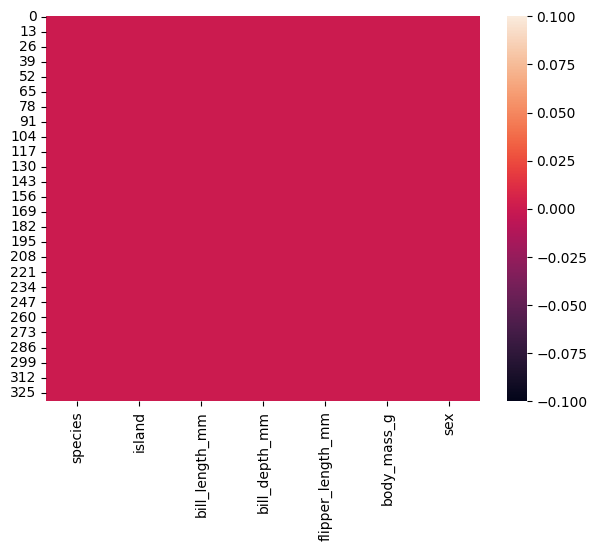

In [6]:
plt.figure(figsize=(7,5))
sns.heatmap(df.isnull());

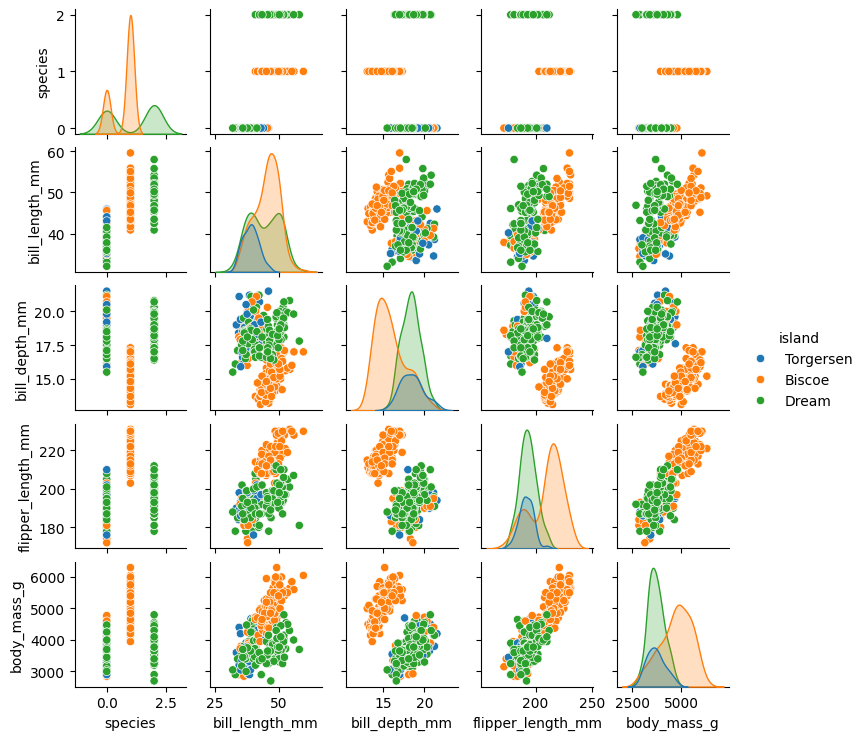

In [7]:
sns.pairplot(df,hue='island',height=1.5)

In [8]:
!pip install jupyter-summarytools -q

In [9]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,species[int64],Mean (sd) : 0.8 (0.8)min < med < max:0.0 < 1.0 < 2.0IQR (CV) : 1.0 (1.0),3 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABlUlEQVR4nO3cQYriQBiG4apBRDcJIngYDzGHnUN4G2nKRdsMaGY3m4bWxISZj36edfIT5UUprLIOw1Dgf/fjXz8APGP16IJa67aUsp44//cwDNeJ98JfX4Zaa93u9/ufXdftpgy/XC5vtdZfYuVVjz5R113X7Y7H47Xv+48xg1trm9PptDufz+tSilB5ycOv/lJK6fv+43A4vE+Yv51wD3xiMUUEoRJBqEQQKhGESgShEkGoRBAqEYRKhKd+mWIcG3nmJ9SZ2cizDKHOz0aeBQh1ITbyzMtiighCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJ4MwUs1nymLhQmcXSx8SFylwWPSYuVGa11DFxiykiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiXCU/891VrbjB3cWtvcbrdVKaWrtY5+sGDd/X5ffcP37KXX/eiaPwS8dwL8194pAAAAAElFTkSuQmCC"">",0(0.0%)
2,island[object],1. Biscoe2. Dream3. Torgersen,163 (48.9%)123 (36.9%)47 (14.1%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABm0lEQVR4nO3bQWrbABRF0a8iQjORMAYvxovoYrsI7cYYa9CETJRBRg0Z1Cl6kqxzVvBtLjYyfs00TQUJP5Y+gP1oquq5qp6WPmRD3qZpeln6iC1qj8fjr67rDksfshXjOF6bpvktuPu1XdcdzufzS9/3r0sfs3a32+3nMAyHy+XyVFViu1NbVdX3/evpdPqz9DEb8bz0AVvlAYEYsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMW3Vx/+0lj5kC7xP/6cdx/E6DMOh/E/rn4zjeK2qt6Xv2CIbhPvZIHxTY8pHyl4+2XwarcAu1lUWUevw8Osqi6j12Mu6ypP2CvhRlxixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxD7+ueuTXtjW7WFdZRK2DDQIx1lXEeEAgZs6vUV9d/GW2KZ/5HJ/NMuUzn+Mrc075HvanFL7HAwIxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YmaZ8pnP8ZXZpnzmc3xmg0CMKR8x70q8o0ovbDR2AAAAAElFTkSuQmCC"">",0(0.0%)
3,bill_length_mm[float64],Mean (sd) : 44.0 (5.5)min < med < max:32.1 < 44.5 < 59.6IQR (CV) : 9.1 (8.0),163 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC5klEQVR4nO3dsU7bQBjA8e8SkpoQ2URRYWPpwFCpg8c8RB+2j9CBB0AMXTqxIUFkhBs3juMuBYUF4jsf9nf5//ZLPPyVxB/H2dR1LUDfDbq+AGAfR11fAF4zxhyLyNjhJdZ1Xa/aup6+INQeMcYcz+fz73Ecz2xf4/HxcWmM+RFarITaL+M4jmeLxWKVJEnRdHGWZdHV1dXs/v5+LCKECr+SJCnOzs7+WC4/bvVieoKbKahAqFCBUKFCr3+jOo5qghzTHKrehuo6qgl1THOoehuqOIxquh7TOHwTxNvtdtT29YSgz6GKiNOoppMxjcs3QVmWUVVVX4ui+CkituOpIPU+VIWsvwlub29nNzc3k81mM/R1cVoRqic23wTL5TLIYX0bGE9BBUKFCoQKFYL9jVpV1UhEYmOM7UsMRGRrsY4RkwdBhprn+agsy28XFxfD4XDYeLtcVVWjPM+/TKfT34PBoGyylhGTH0GGul6vj6IomqRpWpyfny+brv8/JvqcpumvpusZMfkRZKjPTk5OrP5Y8DwmslnPiMkPbqagAqFCBUKFCoQKFbzeTDlufGYeiRfeQnXd+Mw8Ert8fqI6/Y8680js8j5Htd34zDwSu7iZggqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUCHoYycPkeNJ2719LCehBsT1pO0+P5aTUAPictJ214/lfA+hBsj2pG3p6LGc++BmCioQKlQgVKhAqFDh3Zsph1OjOTEarXkzVJdTozkxGm167xPV+tRoToxGm/aao9qcGs2J0WgTA3+8aOGJ3N72ChAqRMR9n4CI370ChAoRcX8it++9AoSKVxz2CUhVVbF42mJIqGiF7y2Ge4WaZVnU9I2fnp4iEZE8z6O7u7vJR67X+t5ar1tE5OHhYRpF0eTy8tKcnp7+bbJ2tVp9ur6+fvNnwz+sR5sOtRA5oAAAAABJRU5ErkJggg=="">",0(0.0%)
4,bill_depth_mm[float64],Mean (sd) : 17.2 (2.0)min < med < max:13.1 < 17.3 < 21.5IQR (CV) : 3.1 (8.7),79 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACyUlEQVR4nO3cu47aQBSA4TNhQQMotrgIOl5gpRRINDTpUuZh06bbAqTUvAENQkJcBFkLY0iRpFhpw+LLLHOc/+uNXfzCOzPLMZfLRQDffbj3AwC3eLj3A+AlY0xdRGo5PuJ4uVyei3oeXxCqR4wx9U6n8zUIglbWz9jtdmtjzLeyxUqofqkFQdAaj8fPYRhGaS/ebrd2Mpm0VqtVTUQIFdfleH0H5/O5Gobhutfr/cx4+3rG67xGqAXL8/qO49gmSfIYRdGTiGQNtZQItXiZX9/z+bw1m80ap9Op4urhtCJUR8IwjNK+vtfrdSlf20VgHxUqECpUIFSoQKhQgVChAqFCBUKFCoQKFdjw/4e85/VFP8//jlBfwXm9fwj1dZzXe4ZQr+C83h8spqAC36glkyRJVUQCY0yWy739vRWhlsjhcKjGcfxpMBhUKpVK6p+y+Px7K0ItkePx+GCtbQyHw6jf76/TXOv7760

In [10]:
df =  pd.get_dummies(df, columns=['island','sex'],dtype=int, drop_first=True)
df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_male
0,0,39.1,18.7,181,3750,0,1,1
1,0,39.5,17.4,186,3800,0,1,0
2,0,40.3,18.0,195,3250,0,1,0
3,0,36.7,19.3,193,3450,0,1,0
4,0,39.3,20.6,190,3650,0,1,1
...,...,...,...,...,...,...,...,...
328,2,55.8,19.8,207,4000,1,0,1
329,2,43.5,18.1,202,3400,1,0,0
330,2,49.6,18.2,193,3775,1,0,1
331,2,50.8,19.0,210,4100,1,0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int64  
 1   bill_length_mm     333 non-null    float64
 2   bill_depth_mm      333 non-null    float64
 3   flipper_length_mm  333 non-null    int64  
 4   body_mass_g        333 non-null    int64  
 5   island_Dream       333 non-null    int32  
 6   island_Torgersen   333 non-null    int32  
 7   sex_male           333 non-null    int32  
dtypes: float64(2), int32(3), int64(3)
memory usage: 17.0 KB


In [12]:
#STEP 0 FILTERING
#remove features not useful
features_to_remove = []
df_clean = df.drop(features_to_remove, axis=1)

In [13]:
# STEP 1 - TRAIN TEST SPLITTING
#Feature matrix and target vector
X_ = df_clean.drop(['species'], axis=1) # matrice Features
y = df_clean['species']                #Target

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
standardized_data = sc.fit_transform(X_)

X = standardized_data

In [15]:
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [16]:
classifiers = [DecisionTreeClassifier(max_depth=4),
               RandomForestClassifier(n_estimators=200,random_state=667),
               GradientBoostingClassifier(),
               GradientBoostingClassifier(n_estimators=50),
               LogisticRegression(max_iter=1000),
               GaussianNB(),
               KNeighborsClassifier(n_neighbors=2),
               SVC(probability=True,kernel='rbf'),
               XGBClassifier()
               ]

In [17]:
# Split the dataset into 70% Training and 30% Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=667
                                                    )
for cls in classifiers:
    cls.fit(X_train, y_train)
    cls.predict(X_test)

### ConfusionMatrix

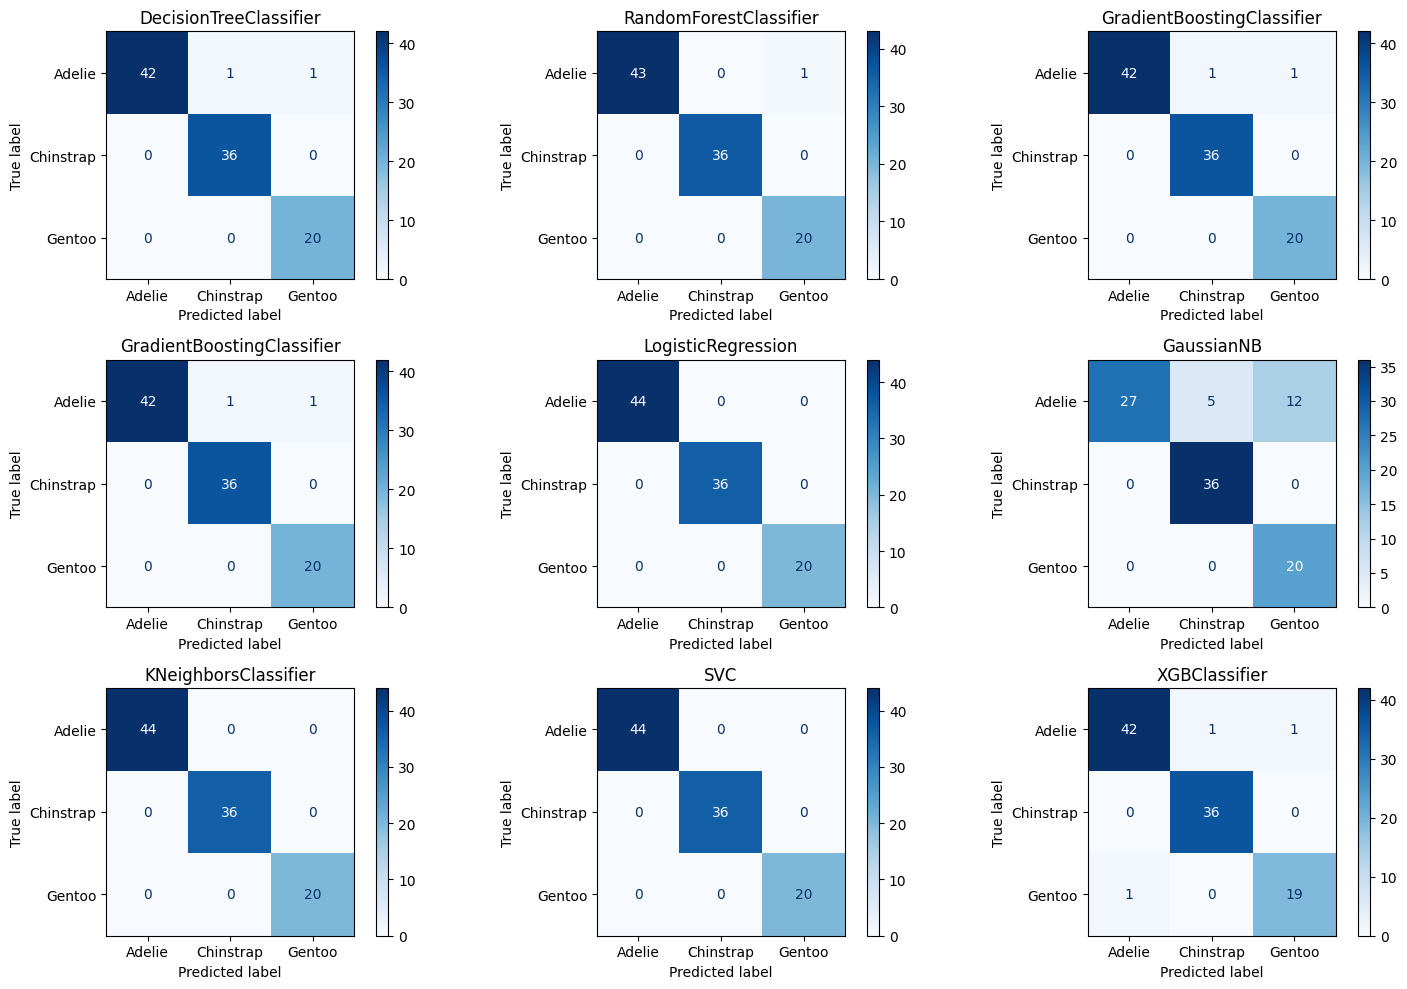

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

labels = ['Adelie','Chinstrap','Gentoo']
for cls, ax in zip(classifiers, axes.flatten()):
    ConfusionMatrixDisplay.from_estimator(cls,
                                            X_test,
                                            y_test,
                                            ax=ax,
                                            cmap='Blues',
                                            display_labels=labels,
                                            )
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()
#plt.show()

In [ ]:
from sklearn.metrics import classification_report

for cls, ax in zip(classifiers, axes.flatten()):
    print(cls)
    print(classification_report(y_test,cls.predict(X_test)))

DecisionTreeClassifier(max_depth=4)
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        44
           1       0.97      1.00      0.99        36
           2       0.95      1.00      0.98        20

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

RandomForestClassifier(n_estimators=200, random_state=667)
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        44
           1       1.00      1.00      1.00        36
           2       0.95      1.00      0.98        20

    accuracy                           0.99       100
   macro avg       0.98      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

GradientBoostingClassifier()
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        44
     

#### ## Fine Tune Model with CrossValidation and GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
param_grid = { 
            'penalty' : ['l1', 'l2'],
            'C' : [1.0,1.5,2.0],
            'solver':['liblinear','saga'],
            }

lr = LogisticRegression(random_state=667)
grid_search_lr = GridSearchCV(estimator = lr,
                            param_grid = param_grid,
                            cv = 5,
                            n_jobs = -1,
                            verbose = 2
                            )

In [ ]:
# Fit the grid search to the data
grid_search_lr.fit(X_train, y_train)
grid_search_lr.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
## Put these parameters inside the final Pipeline!!